# Machine Learning Classification Model

In [ ]:
???

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
...,...,...
2023-03-14,UP,DOWN
2023-03-15,UP,UP


## Load the data

In [3]:
import pandas as pd

df = pd.read_excel('data/msft_linkedin_processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,Up
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,Up
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,Up
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,Down
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,Down
...,...,...,...,...,...,...,...
2023-05-19,316.739990,318.750000,316.369995,318.339996,27529500,0.884238,Up
2023-05-22,318.600006,322.589996,318.010010,321.179993,24115700,-1.877810,Down
2023-05-23,320.029999,322.720001,315.250000,315.260010,30797200,-0.449260,Down


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [4]:
target = df.change_tomorrow_direction

In [5]:
explanatory = df.drop(columns=['change_tomorrow',	'change_tomorrow_direction'])

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model_dt = DecisionTreeClassifier(max_depth=15)

In [26]:
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

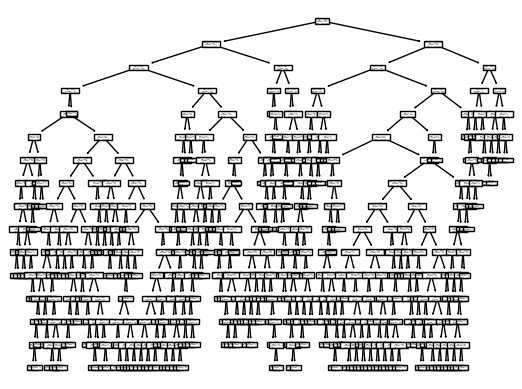

In [27]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [30]:
y_pred = model_dt.predict(X=explanatory)

In [31]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,Up,Up
2016-12-09,Up,Up
2016-12-12,Up,Up
2016-12-13,Down,Down
2016-12-14,Down,Down
...,...,...
2023-05-19,Up,Up
2023-05-22,Down,Down
2023-05-23,Down,Down


### Evaluate the model: compare predictions with the reality

In [32]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction
comp

Date
2016-12-08    True
2016-12-09    True
2016-12-12    True
2016-12-13    True
2016-12-14    True
              ... 
2023-05-19    True
2023-05-22    True
2023-05-23    True
2023-05-24    True
2023-05-25    True
Length: 1626, dtype: bool

In [33]:
comp.sum()

1381

In [34]:
len(comp)

1626

In [35]:
comp.sum()/len(comp)

0.8493234932349324

In [36]:
model_dt.score(X=explanatory, y=target)

0.8493234932349324

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [38]:
import os

In [ ]:
os.makedirs('models')

In [ ]:
import pickle

In [74]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)